# Data Science HW4+5

Notebook by: Nicholas C Soucy

For: COS 598 Data Science HW4+5

## Setting Up & Imports

In [1]:
import numpy as np
from google.colab import drive
import pandas as pd
import sklearn
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
import time
import matplotlib.pyplot as plt
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


## Task 1: Process the Data

Load Data from spambase.data

In [33]:
# Loads the CSV data
df = pd.read_csv('drive/MyDrive/Data Science Applications/Homework/HW4/spambase.data', header=None)

Create X and Y from features and labels

In [34]:
# The first 57 columns are features
# The last column has the labels
X, y = df.iloc[:, :57].values, df.iloc[:, 57].values
print(X.shape,y.shape)

(4601, 57) (4601,)


Split into training and testing (80/20 split) using stratify=y.

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(3680, 57) (921, 57) (3680,) (921,)


Min-Max Scale the features in the training set to values between 0 and 1.

In [36]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)

In [37]:
print(scaler.data_max_)
print(scaler.data_min_)

[4.5400e+00 1.4280e+01 5.1000e+00 4.2810e+01 1.0000e+01 5.8800e+00
 7.2700e+00 1.1110e+01 5.2600e+00 1.8180e+01 2.0000e+00 9.6700e+00
 5.5500e+00 1.0000e+01 2.8600e+00 2.0000e+01 7.1400e+00 9.0900e+00
 1.4280e+01 1.8180e+01 1.1110e+01 1.7100e+01 5.4500e+00 1.2500e+01
 2.0830e+01 1.4280e+01 3.3330e+01 9.0900e+00 1.4280e+01 4.7600e+00
 1.2500e+01 4.7600e+00 1.8180e+01 4.7600e+00 2.0000e+01 7.6900e+00
 6.8900e+00 7.4000e+00 1.1110e+01 4.7600e+00 7.1400e+00 1.4280e+01
 3.5700e+00 1.6660e+01 2.1420e+01 2.2050e+01 2.1700e+00 8.3300e+00
 4.3850e+00 4.2710e+00 4.0810e+00 3.2478e+01 6.0030e+00 1.9829e+01
 1.1025e+03 2.2040e+03 9.1630e+03]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 1. 1.]


Use minimums and maximums of the columns from the training set to scale the features in the test set.

In [38]:
print(X_test[0])

[ 0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
  0.     0.     0.     0.     0.     0.     0.     0.     7.31   0.
  0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
  0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
  0.     0.     0.     0.     0.     0.     0.     0.     0.     0.
  0.     0.     0.     0.     1.714  4.    12.   ]


This is where I make each value in X_test the (value - min_of_column)/ (max_of_column - min_of_column) thereby normalizing the data between 0 and 1 of the test set based on the mins and maxes from the training set.

In [39]:
for i, val in enumerate(X_test):
  for j in range(len(X_test[0])):
    X_test[i][j] = (X_test[i][j] - scaler.data_min_[j]) / (scaler.data_max_[j] - scaler.data_min_[j])

In [40]:
print(X_test[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.51190476 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.00064821 0.00136178 0.00120061]


In [49]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(3680, 57) (921, 57) (3680,) (921,)


## Task 2: Train Machine Learning Models

### Linear Support Vector Machine

In [50]:
svm_model = svm.LinearSVC()
# learn from train data
svm_model.fit(X_train, y_train)
# predict for test data
y_pred_svm = svm_model.predict(X_test)

In [57]:
# get accuracy
svm_acc = accuracy_score(y_test, y_pred_svm)
print(svm_acc)

0.9131378935939196


In [52]:
print(svm_model.coef_ )

[[-0.16543073 -0.3251587   0.43794986  1.35707737  1.72105039  1.30181916
   5.44557177  2.34766147  0.97564335  0.69763642  0.03395237 -0.52609989
  -0.05479719  0.17955739  1.11087129  3.97947741  2.02389313  0.8299276
   0.54072619  1.96180418  1.08163139  1.99000191  3.85095767  3.11576248
  -5.59597471 -2.95366312 -5.86541261  0.71198592 -1.54318954 -0.81949349
  -0.69363923 -0.59146215 -2.0095528  -0.51115608 -1.22282619  1.33501127
  -0.37269795 -0.69132207 -1.6287194  -0.67109953 -1.97268948 -3.06863364
  -0.72468506 -2.36943203 -3.18555425 -4.01369853 -1.24627017 -1.88150222
  -1.47617096 -0.28672086 -0.65980481  2.90375051  5.43580391  0.89054051
  -0.03221222  2.95495759  1.67077343]]


In SVM, there is a hyperplane that seperates the classes as best as possible. The coefficents above represent the hyperplane. These coefficents are coordinates of a vector which is orthogonal to the hyperplane. 

With this vector, you can take the dot product of any point with the vector: if the dot product is positive, it is classified as the positive class, and if negative, the negative class. 

The SVM's coefficents do teach us something about the importance of each feature too. The absolute size of the coefficent relative to others gives an indication of how important the feature was for seperation. Higher the absolute value, the more important the feature was.

### Logistic Regression

In [53]:
lr_model = LogisticRegression()
# learn from train data
lr_model.fit(X_train, y_train)
# predict for test data
y_pred_lr = lr_model.predict(X_test)

In [56]:
# get accuracy
lr_acc = accuracy_score(y_test, y_pred_lr)
print(lr_acc)

0.8892508143322475


In [55]:
print(lr_model.coef_ )

[[-0.0414229  -0.85378183  1.33096463  1.28186897  3.54167678  2.74985603
   7.19155778  3.26660463  2.46182     1.37708603  1.18595004 -1.46521653
   0.85424828  0.51035523  2.07145774  4.70935406  3.77680918  2.26149669
   1.69741555  2.21153982  3.20985086  2.84932247  5.63661773  3.53295448
  -5.75489118 -3.51288523 -4.40739143 -0.44385545 -1.38813813 -2.32917138
  -0.82151052 -0.81344539 -1.99822712 -0.70743085 -1.08018968  0.24335685
  -1.91116604 -0.62638514 -1.8029837  -0.49876112 -1.79912283 -3.30744615
  -1.82975146 -1.88722459 -3.51218036 -3.4025675  -1.34029209 -1.36885297
  -1.58289045 -0.52251781 -0.78844202  3.43922285  5.36207739  0.84153015
   0.52651072  4.14421844  3.7332181 ]]


Logistic regression is a statistical model that uses Logistic function to model the conditional probability.

Each coefficent given by the fitted logistic regression model is associated with a feature. This coefficent is the expected change in log odds of having the outcome per unit change in that associated feature. Therefore, increasing the predictor by 1 unit multiplies the odds of having the outcome by e^coefficent.

Therefore if we have a coefficent, e^coefficent will be the odds ratio that associates that feature to the odds of the email being spam.

## Task 3: Train Neural Network Models

### Neural Network 1

####Build the Model

In [14]:
#Build Model
model1 = tf.keras.Sequential([
    tf.keras.Input(shape=(57,)),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=2, activation='softmax')
])

####Compile the Model

In [15]:
#Compile Model
model1.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

####Train the Model

In [16]:
tic = time.perf_counter()
hist1 = model1.fit(X_train, 
        y_train, 
        epochs = 200)
toc = time.perf_counter()
train_time_I = (toc - tic)

Epoch 1/200
115/115 [==============================] - 2s 3ms/step - loss: 0.5783 - accuracy: 0.7641
Epoch 2/200
115/115 [==============================] - 0s 3ms/step - loss: 0.3452 - accuracy: 0.8867
Epoch 3/200
115/115 [==============================] - 0s 3ms/step - loss: 0.2724 - accuracy: 0.9043
Epoch 4/200
115/115 [==============================] - 0s 3ms/step - loss: 0.2453 - accuracy: 0.9092
Epoch 5/200
115/115 [==============================] - 0s 3ms/step - loss: 0.2277 - accuracy: 0.9147
Epoch 6/200
115/115 [==============================] - 0s 3ms/step - loss: 0.2164 - accuracy: 0.9204
Epoch 7/200
115/115 [==============================] - 0s 3ms/step - loss: 0.2075 - accuracy: 0.9236
Epoch 8/200
115/115 [==============================] - 0s 3ms/step - loss: 0.2012 - accuracy: 0.9236
Epoch 9/200
115/115 [==============================] - 0s 3ms/step - loss: 0.1952 - accuracy: 0.9269
Epoch 10/200
115/115 [==============================] - 0s 3ms/step - loss: 0.1898 - accura

####Plot Training and Testing loss

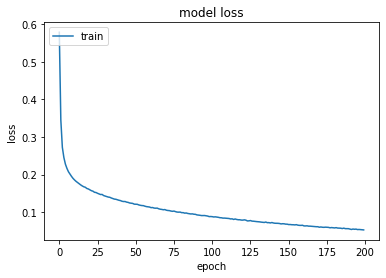

In [17]:
plt.plot(hist1.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

####Plot Accuracy


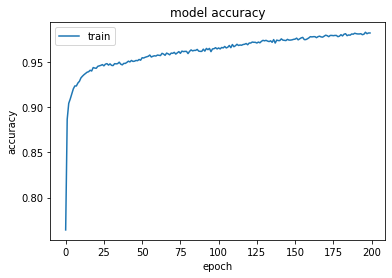

In [18]:
plt.plot(hist1.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

####Evaluate Accuracy

In [19]:
#Get Test accuracy
_, test_acc_I = model1.evaluate(X_test,  y_test, verbose=0)
print('\nTest accuracy:', test_acc_I)


Test accuracy: 0.9435396194458008


### Neural Network 2

####Build the Model

In [20]:
#Build Model2
model2 = tf.keras.Sequential([
    tf.keras.Input(shape=(57,)),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.Dense(units=2, activation='softmax')
])

####Compile the Model

In [21]:
#Compile Model
model2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

####Train the Model

In [22]:
tic = time.perf_counter()
hist2 = model2.fit(X_train, 
        y_train, 
        epochs = 200)
toc = time.perf_counter()
train_time_II = (toc - tic)

Epoch 1/200
115/115 [==============================] - 1s 3ms/step - loss: 0.4121 - accuracy: 0.8478
Epoch 2/200
115/115 [==============================] - 0s 3ms/step - loss: 0.1965 - accuracy: 0.9345
Epoch 3/200
115/115 [==============================] - 0s 3ms/step - loss: 0.1726 - accuracy: 0.9389
Epoch 4/200
115/115 [==============================] - 0s 3ms/step - loss: 0.1628 - accuracy: 0.9375
Epoch 5/200
115/115 [==============================] - 0s 3ms/step - loss: 0.1498 - accuracy: 0.9446
Epoch 6/200
115/115 [==============================] - 0s 3ms/step - loss: 0.1353 - accuracy: 0.9524
Epoch 7/200
115/115 [==============================] - 0s 3ms/step - loss: 0.1307 - accuracy: 0.9530
Epoch 8/200
115/115 [==============================] - 0s 3ms/step - loss: 0.1229 - accuracy: 0.9549
Epoch 9/200
115/115 [==============================] - 0s 3ms/step - loss: 0.1119 - accuracy: 0.9576
Epoch 10/200
115/115 [==============================] - 0s 3ms/step - loss: 0.1116 - accura

####Plot Training and Testing loss

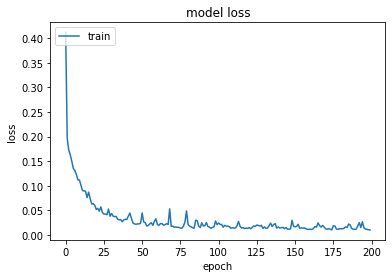

In [23]:
plt.plot(hist2.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

####Plot Accuracy

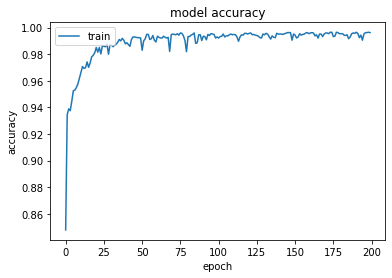

In [24]:
plt.plot(hist2.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

####Evaluate Accuracy

In [25]:
#Get Test accuracy
_, test_acc_II = model2.evaluate(X_test,  y_test, verbose=0)
print('\nTest accuracy:', test_acc_II)


Test accuracy: 0.9413681030273438


### Neural Network 3

####Build the Model

In [26]:
#Build Model3
model3 = tf.keras.Sequential([
    tf.keras.Input(shape=(57,)),
    tf.keras.layers.Dense(units=16, activation='relu'),
    tf.keras.layers.Dense(units=2, activation='softmax')
])

####Compile the Model

In [27]:
#Compile Model
model3.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])

####Train the Model

In [28]:
tic = time.perf_counter()
hist3 = model3.fit(X_train, 
        y_train, 
        epochs = 200)
toc = time.perf_counter()
train_time_III = (toc - tic)

Epoch 1/200
115/115 [==============================] - 1s 3ms/step - loss: 0.6328 - accuracy: 0.6592
Epoch 2/200
115/115 [==============================] - 0s 3ms/step - loss: 0.4706 - accuracy: 0.8370
Epoch 3/200
115/115 [==============================] - 0s 3ms/step - loss: 0.3580 - accuracy: 0.8821
Epoch 4/200
115/115 [==============================] - 0s 3ms/step - loss: 0.3058 - accuracy: 0.8962
Epoch 5/200
115/115 [==============================] - 0s 3ms/step - loss: 0.2788 - accuracy: 0.9057
Epoch 6/200
115/115 [==============================] - 0s 3ms/step - loss: 0.2622 - accuracy: 0.9076
Epoch 7/200
115/115 [==============================] - 0s 3ms/step - loss: 0.2495 - accuracy: 0.9109
Epoch 8/200
115/115 [==============================] - 0s 3ms/step - loss: 0.2395 - accuracy: 0.9122
Epoch 9/200
115/115 [==============================] - 0s 3ms/step - loss: 0.2314 - accuracy: 0.9144
Epoch 10/200
115/115 [==============================] - 0s 3ms/step - loss: 0.2249 - accura

####Plot Training and Testing loss

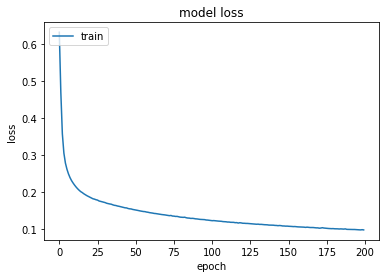

In [29]:
plt.plot(hist3.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

####Plot Accuracy

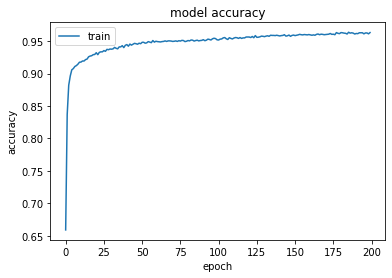

In [30]:
plt.plot(hist3.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train'], loc='upper left')
plt.show()

####Evaluate Accuracy

In [31]:
#Get Test accuracy
_, test_acc_III = model3.evaluate(X_test,  y_test, verbose=0)
print('\nTest accuracy:', test_acc_III)


Test accuracy: 0.9337676167488098


### Model Test Accuracy Anaylsis

Now lets do some anaylsis of the test accuracies for all our models.

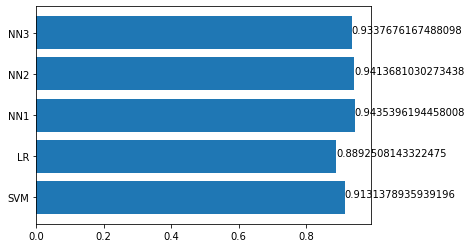

In [58]:
labels = ["SVM","LR","NN1","NN2","NN3"]
accuracies = [svm_acc,lr_acc,test_acc_I,test_acc_II,test_acc_III]

plt.barh(labels, accuracies)
  
for index, value in enumerate(accuracies):
    plt.text(value, index,
             str(value))
  
plt.show()

As you can see SVM out performed logistic regression by roughly 2%. However, each neural network out performed SVM and LR. There were barely any differences between the neural networks as they are similar structure and the data is quite simple. Therefore, all neural networks have around 94% test accuracy.